In [215]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn import neighbors, linear_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


%matplotlib inline

In [216]:
animals = pd.read_csv('C:\\Users\\linoyel\\Documents\\Linoy\\Data Scientist course\\Project 2 - Kaggle - Shelter Animal Outcomes\\df_animals.csv', index_col='AnimalID')
animals.head(3)

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,IsMixed,...,Sex,IsIntact,IsNamed,ColorCategory,Year,Month,YearMonth,DayOfWeek,Date,IsHoliday
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-12-02 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,True,...,Male,Neutered/Spayed,True,Brown,2014,December,201412,Tuesday,2014-12-02,False
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,True,...,Female,Neutered/Spayed,True,Cream,2013,October,201310,Sunday,2013-10-13,False
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,True,...,Male,Neutered/Spayed,True,Blue,2015,January,201501,Saturday,2015-01-31,False


First of all let's prepare an initial data frame with only useful columns for prediction:

In [217]:
animals.columns.values

array(['Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType',
       'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'IsMixed',
       'AgeInYears', 'AgeCategory', 'Sex', 'IsIntact', 'IsNamed',
       'ColorCategory', 'Year', 'Month', 'YearMonth', 'DayOfWeek', 'Date',
       'IsHoliday'], dtype=object)

In [218]:
columns = ['AnimalType', 'Sex', 'IsNamed', 'IsMixed', 'IsIntact', 'AgeCategory', 'ColorCategory', 'OutcomeType']
animals = pd.DataFrame(animals, columns=columns)
animals.head()

,AnimalType,Sex,IsNamed,IsMixed,IsIntact,AgeCategory,ColorCategory,OutcomeType
AnimalID,,,,,,,,
A671945,Dog,Male,True,True,Neutered/Spayed,young adult,Brown,Return_to_owner
A656520,Cat,Female,True,True,Neutered/Spayed,young adult,Cream,Euthanasia
A686464,Dog,Male,True,True,Neutered/Spayed,young adult,Blue,Adoption
A683430,Cat,Male,False,True,Intact,newborn,Blue,Transfer
A667013,Dog,Male,False,False,Neutered/Spayed,young adult,Tan,Transfer


In [219]:
animals['IsIntact'] = animals.IsIntact=='Intact'

In [220]:
animals.head()

,AnimalType,Sex,IsNamed,IsMixed,IsIntact,AgeCategory,ColorCategory,OutcomeType
AnimalID,,,,,,,,
A671945,Dog,Male,True,True,False,young adult,Brown,Return_to_owner
A656520,Cat,Female,True,True,False,young adult,Cream,Euthanasia
A686464,Dog,Male,True,True,False,young adult,Blue,Adoption
A683430,Cat,Male,False,True,True,newborn,Blue,Transfer
A667013,Dog,Male,False,False,False,young adult,Tan,Transfer


In [268]:
animals.shape

(26710, 43)

## Preprocess and split the data

We saw earlier that dogs and cats have totally different behavior, that's why we've decided to split them in 2 data frames:

In [221]:
animals = pd.get_dummies(animals, columns=['Sex', 'AgeCategory', 'ColorCategory'])
animals.head()

,AnimalType,IsNamed,IsMixed,IsIntact,OutcomeType,Sex_Female,Sex_Male,Sex_Unknown,AgeCategory_adult,AgeCategory_baby,...,ColorCategory_Ruddy,ColorCategory_Sable,ColorCategory_Seal,ColorCategory_Silver,ColorCategory_Tan,ColorCategory_Torbie,ColorCategory_Tortie,ColorCategory_Tricolor,ColorCategory_White,ColorCategory_Yellow
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Dog,True,True,False,Return_to_owner,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A656520,Cat,True,True,False,Euthanasia,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A686464,Dog,True,True,False,Adoption,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A683430,Cat,False,True,True,Transfer,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A667013,Dog,False,False,False,Transfer,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [222]:
dogs = animals.loc[animals['AnimalType'] == 'Dog'].drop(['AnimalType'], axis=1)
cats = animals.loc[animals['AnimalType'] == 'Cat'].drop(['AnimalType'], axis=1)

In [223]:
X_dogs = dogs.drop(['OutcomeType'], axis=1)
y_dogs = dogs.OutcomeType

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(X_dogs, y_dogs, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [224]:
X_cats = cats.drop(['OutcomeType'], axis=1)
y_cats = cats.OutcomeType

X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(X_cats, y_cats, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Random Forest

### Naive classification

#### Dogs:

In [225]:
clf_RF_dogs = RandomForestClassifier()
clf_RF_dogs.fit(X_train_dogs, y_train_dogs)
print(clf_RF_dogs.score(X_train_dogs, y_train_dogs))
print(clf_RF_dogs.score(X_test_dogs, y_test_dogs))

0.5857993586807146
0.5483112441214194


#### Cats:

In [226]:
clf_RF_cats = RandomForestClassifier()
clf_RF_cats.fit(X_train_cats, y_train_cats)
print(clf_RF_cats.score(X_train_cats, y_train_cats))
print(clf_RF_cats.score(X_test_cats, y_test_cats))

0.7722657756072484
0.7443045563549161


We see that we get better results for cats

### Feature importance

In [227]:
print(pd.Series(clf_RF_dogs.feature_importances_,
                index=X_dogs.columns).sort_values(ascending=False))

IsIntact                   0.329734
IsNamed                    0.114357
AgeCategory_baby           0.076876
IsMixed                    0.064691
AgeCategory_old            0.045062
AgeCategory_young adult    0.036953
AgeCategory_newborn        0.035464
AgeCategory_adult          0.034594
ColorCategory_Black        0.017999
AgeCategory_young          0.017895
ColorCategory_Brown        0.016817
Sex_Female                 0.016790
ColorCategory_Blue         0.015518
ColorCategory_Red          0.015410
ColorCategory_White        0.014801
ColorCategory_Tricolor     0.014708
ColorCategory_Tan          0.014703
Sex_Male                   0.014020
Sex_Unknown                0.011790
ColorCategory_Yellow       0.011685
ColorCategory_Sable        0.010928
ColorCategory_Gray         0.010899
ColorCategory_Buff         0.010630
ColorCategory_Chocolate    0.010482
ColorCategory_Cream        0.010256
ColorCategory_Fawn         0.008797
ColorCategory_Gold         0.006417
ColorCategory_Silver       0

In [230]:
print(pd.Series(clf_RF_cats.feature_importances_,
                index=X_cats.columns).sort_values(ascending=False))

IsIntact                   0.293598
IsNamed                    0.173983
AgeCategory_baby           0.157343
AgeCategory_newborn        0.061387
Sex_Unknown                0.058302
AgeCategory_young adult    0.036635
AgeCategory_old            0.026135
AgeCategory_adult          0.025220
Sex_Female                 0.025052
Sex_Male                   0.020351
IsMixed                    0.017916
AgeCategory_young          0.010982
ColorCategory_Black        0.010318
ColorCategory_Brown        0.008628
ColorCategory_Orange       0.008361
ColorCategory_Blue         0.008154
ColorCategory_White        0.007875
ColorCategory_Gray         0.006826
ColorCategory_Torbie       0.006053
ColorCategory_Lynx         0.005980
ColorCategory_Seal         0.005905
ColorCategory_Cream        0.005567
ColorCategory_Flame        0.004949
ColorCategory_Calico       0.004175
ColorCategory_Tortie       0.004142
ColorCategory_Silver       0.002224
ColorCategory_Chocolate    0.001679
ColorCategory_Lilac        0

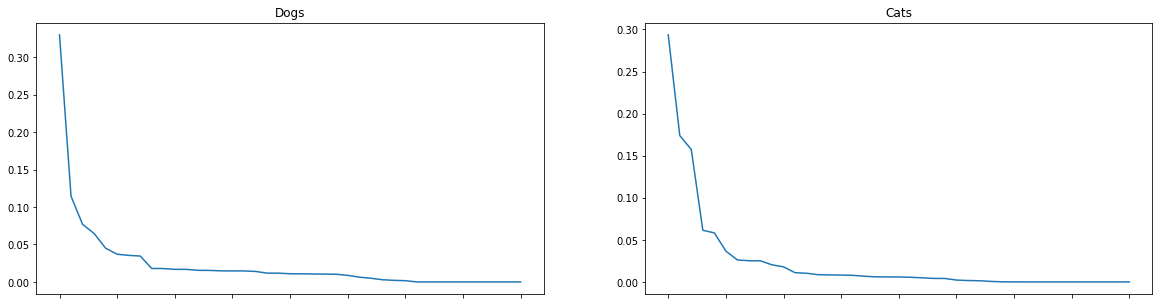

In [233]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
pd.Series(clf_RF_dogs.feature_importances_,
                index=X_dogs.columns).sort_values(ascending=False).plot(ax=ax1, title='Dogs')
pd.Series(clf_RF_cats.feature_importances_,
                index=X_cats.columns).sort_values(ascending=False).plot(ax=ax2, title='Cats')

We see that features that contribute the most are similar for dogs and cats (IsIntact, IsNamed and AgeCategory_baby). Some of the color categories don't contibute at all, but the categories are different for dogs and cats. We'll drop the unimportant features for each animal type:

In [243]:
dogs_fi = dogs.drop(['ColorCategory_Lilac', 'ColorCategory_Agouti', 'ColorCategory_Flame', 'ColorCategory_Pink', 'ColorCategory_Calico', 'ColorCategory_Seal', 'ColorCategory_Torbie', 'ColorCategory_Tortie', 'ColorCategory_Lynx' ], axis=1)
cats_fi = cats.drop(['ColorCategory_Fawn', 'ColorCategory_Sable', 'ColorCategory_Liver', 'ColorCategory_Ruddy', 'ColorCategory_Red', 'ColorCategory_Agouti', 'ColorCategory_Apricot', 'ColorCategory_Gold', 'ColorCategory_Yellow'], axis=1)

In [263]:
print(dogs_fi.shape)
print(cats_fi.shape)

(15593, 33)
(11117, 33)


In [212]:
X_dogs = dogs_fi.drop(['OutcomeType'], axis=1)
y_dogs = dogs_fi.OutcomeType

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(X_dogs, y_dogs, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [213]:
X_cats = cats_fi.drop(['OutcomeType'], axis=1)
y_cats = cats_fi.OutcomeType

X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(X_cats, y_cats, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Grid search

#### Dogs:

In [18]:
parameters = {
    'max_depth': range(2, 10),
    'min_samples_split': [30, 40, 50],
    'min_samples_leaf': [5, 10, 15, 20, 30]}

grid_search = GridSearchCV(clf_RF_dogs, parameters, cv=10)
grid_search.fit(X_train_dogs, y_train_dogs)
print(grid_search.best_score_)
grid_search.best_params_

0.5590471827759963


{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 40}

In [19]:
print(grid_search.score(X_test_dogs, y_test_dogs))

0.5476699444206926


#### Cats:

In [20]:
parameters = {
    'max_depth': range(2, 10),
    'min_samples_split': [30, 40, 50],
    'min_samples_leaf': [5, 10, 15, 20, 30]}

grid_search = GridSearchCV(clf_RF_cats, parameters, cv=10)
grid_search.fit(X_train_cats, y_train_cats)
print(grid_search.best_score_)
grid_search.best_params_

0.7493895386197147


{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 40}

In [21]:
print(grid_search.score(X_test_cats, y_test_cats))

0.7502997601918465


We see that the prediction is not so good, especially for dogs. Let's try a logistic regression model for them:

# Logistic Regression (Dogs)


### Naive classification

In [161]:
dogs_train, dogs_test = train_test_split(dogs, train_size=0.7, 
                              random_state=12345)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [162]:
X = dogs_train.drop('OutcomeType', axis=1)
y = dogs_train['OutcomeType']

clf_LR_dogs = LogisticRegression().fit(X, y)

In [163]:
dogs_train['OutcomeType prediction'] = clf_LR_dogs.predict(X)
dogs_train.head()

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,IsNamed,IsMixed,IsIntact,OutcomeType,Sex_Female,Sex_Male,Sex_Unknown,AgeCategory_adult,AgeCategory_baby,AgeCategory_newborn,...,ColorCategory_Sable,ColorCategory_Seal,ColorCategory_Silver,ColorCategory_Tan,ColorCategory_Torbie,ColorCategory_Tortie,ColorCategory_Tricolor,ColorCategory_White,ColorCategory_Yellow,OutcomeType prediction
AnimalID,,,,,,,,,,,,,,,,,,,,,
A668515,True,False,False,Adoption,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,Adoption
A707922,False,True,False,Transfer,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adoption
A697252,True,True,False,Adoption,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Adoption
A697821,False,True,False,Transfer,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Adoption
A651363,True,True,False,Return_to_owner,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adoption


In [164]:
cm = confusion_matrix(y_true=dogs_train['OutcomeType'],
                      y_pred=dogs_train['OutcomeType prediction'])
pd.DataFrame(cm,
             index=clf_LR_dogs.classes_,
             columns=clf_LR_dogs.classes_)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,3932,0,1,545,65
Died,6,0,1,7,24
Euthanasia,167,0,16,163,240
Return_to_owner,1559,0,1,1120,358
Transfer,1228,0,14,392,1076


In [165]:
print(classification_report(y_true=dogs_train['OutcomeType'],
                            y_pred=dogs_train['OutcomeType prediction']))

                 precision    recall  f1-score   support

       Adoption       0.57      0.87      0.69      4543
           Died       0.00      0.00      0.00        38
     Euthanasia       0.48      0.03      0.05       586
Return_to_owner       0.50      0.37      0.43      3038
       Transfer       0.61      0.40      0.48      2710

    avg / total       0.55      0.56      0.53     10915



C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It's still only 55% for train. Maybe we can try to predict each outcome probability separately, and by that increase the overall prediction accuracy:

In [166]:
dogs_train['OutcomeType'].unique()

array(['Adoption', 'Transfer', 'Return_to_owner', 'Euthanasia', 'Died'],
      dtype=object)

In [167]:
types = ['Adoption', 'Transfer', 'Return_to_owner', 'Euthanasia', 'Died']
for typ in types:
    print('\n\n', typ, '\n', len(typ) * '=')
    clf_LR_dogs = LogisticRegression().fit(X, y==typ)
    
    cm = confusion_matrix(y_true=y==typ, 
                          y_pred=clf_LR_dogs.predict(X))
    print(pd.DataFrame(cm, 
                       index=clf_LR_dogs.classes_, 
                       columns=clf_LR_dogs.classes_))

    print(classification_report(y_true=y==typ, 
                                y_pred=clf_LR_dogs.predict(X)))



 Adoption 
       False  True 
False   4881   1491
True    1814   2729
             precision    recall  f1-score   support

      False       0.73      0.77      0.75      6372
       True       0.65      0.60      0.62      4543

avg / total       0.69      0.70      0.70     10915



 Transfer 
       False  True 
False   7823    382
True    1930    780
             precision    recall  f1-score   support

      False       0.80      0.95      0.87      8205
       True       0.67      0.29      0.40      2710

avg / total       0.77      0.79      0.75     10915



 Return_to_owner 
       False  True 
False   7501    376
True    2573    465
             precision    recall  f1-score   support

      False       0.74      0.95      0.84      7877
       True       0.55      0.15      0.24      3038

avg / total       0.69      0.73      0.67     10915



 Euthanasia 
       False  True 
False  10314     15
True     566     20
             precision    recall  f1-score   support



C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [168]:
for typ in types:
    clf_LR_dogs = LogisticRegression().fit(X, y==typ)
    dogs_train[typ + '_pred'] = clf_LR_dogs.predict_proba(X)[:, 1]

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
def typ_predict(rec):
    return rec.idxmax()[:-5]

In [170]:
dogs_train['OutcomeType pred'] = dogs_train.iloc[:,-5:].apply(typ_predict, axis=1)
dogs_train.head()

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,IsNamed,IsMixed,IsIntact,OutcomeType,Sex_Female,Sex_Male,Sex_Unknown,AgeCategory_adult,AgeCategory_baby,AgeCategory_newborn,...,ColorCategory_Tricolor,ColorCategory_White,ColorCategory_Yellow,OutcomeType prediction,Adoption_pred,Transfer_pred,Return_to_owner_pred,Euthanasia_pred,Died_pred,OutcomeType pred
AnimalID,,,,,,,,,,,,,,,,,,,,,
A668515,True,False,False,Adoption,1,0,0,0,1,0,...,0,1,0,Adoption,0.819483,0.185858,0.075098,0.002998,0.000992,Adoption
A707922,False,True,False,Transfer,0,1,0,0,0,0,...,0,0,0,Adoption,0.466668,0.277169,0.064641,0.090290,0.004170,Adoption
A697252,True,True,False,Adoption,0,1,0,0,0,0,...,0,1,0,Adoption,0.439583,0.181199,0.343111,0.029595,0.000717,Adoption
A697821,False,True,False,Transfer,1,0,0,0,0,0,...,0,1,0,Adoption,0.519430,0.295000,0.052441,0.079140,0.002992,Adoption
A651363,True,True,False,Return_to_owner,1,0,0,0,0,0,...,0,0,0,Adoption,0.521581,0.142930,0.308826,0.029516,0.001016,Adoption


In [171]:
print(classification_report(y_true=dogs_train['OutcomeType'], 
                            y_pred=dogs_train['OutcomeType pred']))

                 precision    recall  f1-score   support

       Adoption       0.57      0.87      0.69      4543
           Died       0.00      0.00      0.00        38
     Euthanasia       0.48      0.03      0.05       586
Return_to_owner       0.50      0.37      0.43      3038
       Transfer       0.61      0.40      0.48      2710

    avg / total       0.55      0.56      0.53     10915



C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Well, it didn't really help much, so there is no need to validate these results.

## KNN

In [174]:
X_dogs = dogs.drop(['OutcomeType'], axis=1)
y_dogs = dogs.OutcomeType

X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(X_dogs, y_dogs, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [175]:
X_cats = cats.drop(['OutcomeType'], axis=1)
y_cats = cats.OutcomeType

X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(X_cats, y_cats, train_size=0.7, random_state=456784)

C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Naive classification

#### Dogs:

In [176]:
clf_KNN_dogs = neighbors.KNeighborsClassifier()

clf_KNN_dogs.fit(X_train_dogs, y_train_dogs)
print(clf_KNN_dogs.score(X_train_dogs, y_train_dogs))
print(clf_KNN_dogs.score(X_test_dogs, y_test_dogs))

0.5340357306459002
0.4927319367250962


#### Cats:

In [177]:
clf_KNN_cats = neighbors.KNeighborsClassifier()

clf_KNN_cats.fit(X_train_cats, y_train_cats)
print(clf_KNN_cats.score(X_train_cats, y_train_cats))
print(clf_KNN_cats.score(X_test_cats, y_test_cats))

0.7366662382727156
0.7206235011990407


### Pipeline

#### Dogs:

In [26]:
for n in range (1,10):
    steps = [('scale', StandardScaler()), ('reduce_dim', PCA(n)), ('clf', neighbors.KNeighborsClassifier())]
    pipe = Pipeline(steps)    
    
    pipe.fit(X_train_dogs, y_train_dogs)

    print(f'results for {n} components:')
    print(pipe.score(X_train_dogs, y_train_dogs))
    print(pipe.score(X_test_dogs, y_test_dogs), '\n')

results for 1 components:
0.45616124599175445
0.4450619923044036 

results for 2 components:
0.5205680256527714
0.4848225737494656 

results for 3 components:
0.5398076042143839
0.516887558785806 

results for 4 components:
0.5356848373797526
0.49807610089781956 

results for 5 components:
0.5378836463582226
0.5019238991021804 

results for 6 components:
0.5404489234997709
0.5136810602821719 

results for 7 components:
0.5451213925790197
0.519880290722531 

results for 8 components:
0.5405405405405406
0.5085506626763574 

results for 9 components:
0.544388456252863
0.5010688328345447 



PCA with 6 components has the best result for dogs: 51%

#### Cats:

In [27]:
for n in range (1,10):
    steps = [('scale', StandardScaler()), ('reduce_dim', PCA(n)), ('clf', neighbors.KNeighborsClassifier())]
    pipe = Pipeline(steps)    
    
    pipe.fit(X_train_cats, y_train_cats)

    print(f'results for {n} components:')
    print(pipe.score(X_train_cats, y_train_cats))
    print(pipe.score(X_test_cats, y_test_cats), '\n')

results for 1 components:
0.6928415370774965
0.6900479616306955 

results for 2 components:
0.7448914021334019
0.7287170263788969 

results for 3 components:
0.729983292635908
0.7140287769784173 

results for 4 components:
0.7508032386582701
0.730515587529976 

results for 5 components:
0.7533736023647346
0.7260191846522782 

results for 6 components:
0.742064002056291
0.7284172661870504 

results for 7 components:
0.7393651201645033
0.710431654676259 

results for 8 components:
0.7493895386197147
0.7326139088729017 

results for 9 components:
0.7446343657627554
0.7203237410071942 



PCA with 8 components has the best result for cats: 73%

In overall we see that using scaling and PCA didn't improve the prediction much - probably cause we don't have too many features here anyway. If we compare the 3 models we used, Random Forest after feature reduction is better than KNN: 54% vs 51% for dogs and 75% vs 73% for cats. Logistic regression didn't improve the prediction accuracy. Lets's try to boost the Random Forest model:

# Ensemble

In [191]:
clf_base = AdaBoostClassifier(RandomForestClassifier(max_depth = 3))

In [192]:
clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train_cats, y_train_cats)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            m...e=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [194]:
print("{:3} classifier:\n \
    \ttrain accuracy: {:.2f}\n \
    \ttest accuracy: {:.2f}"\
    .format('DT ADA boosting', 
            clf_adaboost.score(X_train_cats, y_train_cats), 
            clf_adaboost.score(X_test_cats, y_test_cats)))
print(classification_report(y_test_cats, clf_adaboost.predict(X_test_cats)))

DT ADA boosting classifier:
     	train accuracy: 0.76
     	test accuracy: 0.74
                 precision    recall  f1-score   support

       Adoption       0.71      0.90      0.80      1320
           Died       0.00      0.00      0.00        46
     Euthanasia       0.47      0.18      0.26       204
Return_to_owner       0.26      0.03      0.06       154
       Transfer       0.79      0.77      0.78      1612

    avg / total       0.71      0.74      0.71      3336



C:\Users\linoyel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The boosting didn't improve the results. In conclusion, the best model out of the 3 models we've tried is Random Forest with the following results: 54% for dogs and 75% for cats. These results are not satisfactory. The next steps would be returning to feature selection and trying to find more features that can lead to a better prediction.